# The "lxml" Package and xpath Expression for Web Scraping

The python lxml package is a popular tool for scraping (extracting data from) web pages. Typically, there are 4 steps involved in this process:

* download a page in html format
* "parse it" to an object lxml can work with
* use xpath expressions and other methods to navigate through the html "tree" and scrape data
* clearning and analysing the data

The "Basic Example" section below goes through all of these steps to illustrate the process. To download a page the "get" http method is required, I have used the requests package to implement the get. Parsing the page and using xpath expressions to navigate the tree is accomplished with classes within the lxml package. Cleaning and data analysis has been performed with string manipulation and the pandas package. The appendix section contains untility functions that are used to help with the analysis presented but are not central to it. THE CELLS IN THE APPENDIX SHOULD BE RUN FIRST!!

The "xpath Tutorial" section below is based on the [w3 schools xpath tutorial](https://www.w3schools.com/xml/xpath_intro.asp), with the xpath commands performed via the lxml package.

#### lxml general information

The lxml Package is a Pythonic binding for the C libraries libxml2 & libxslt, it is compatible but similar to the well known ElementTree API. The latest release works with all CPython versions from 2.6 to 3.6.

For more information about this package including installation notes visit the links below:

* [lxml homepage](https://lxml.de/)
* [PyPI page](https://pypi.org/project/lxml/)

## Basic Example

#### Downloading and Parsing

The code below uses the requests package to download a html page from the internet. The html class within the lxml library is then used to parse the content of the download into an object suitable for lxml manipulation. The page has been "pretty printed" for reference. The data is then extracted using an xpath expression, from within the lxml library. It is then cleaned and loaded into a pandas data frame and used to produce a simple bar plot.

In [27]:
from lxml import html
import requests

#Getting the page and parsing it
page = requests.get('http://econpy.pythonanywhere.com/ex/001.html')
root = html.fromstring(page.content)
print(html.tostring(root,pretty_print=True).decode('UTF-8'))


<html>
<head>
    <meta charset="utf-8">
    <title>Items 1 to 20 -- Example Page 1</title>
    <script type="text/javascript">
      var _gaq = _gaq || [];
      _gaq.push(['_setAccount', 'UA-23648880-1']);
      _gaq.push(['_trackPageview']);
      _gaq.push(['_setDomainName', 'econpy.org']);
    </script>
</head>
<body>
<div align="center">1, <a href="http://econpy.pythonanywhere.com/ex/002.html">[<font color="green">2</font>]</a>, <a href="http://econpy.pythonanywhere.com/ex/003.html">[<font color="green">3</font>]</a>, <a href="http://econpy.pythonanywhere.com/ex/004.html">[<font color="green">4</font>]</a>, <a href="http://econpy.pythonanywhere.com/ex/005.html">[<font color="green">5</font>]</a>
</div>
<div title="buyer-info">
  <div title="buyer-name">Carson Busses</div>
  <span class="item-price">$29.95</span><br>
</div>
<div title="buyer-info">
  <div title="buyer-name">Earl E. Byrd</div>
  <span class="item-price">$8.37</span><br>
</div>
<div title="buyer-info">
  <div title=

#### Extracting Data using xpath

In [28]:
#This will create a list of buyers:
buyers = root.xpath('//div[@title="buyer-name"]/text()')

#This will create a list of prices
prices = root.xpath('//span[@class="item-price"]/text()')

#### Cleaning and Analysing the Data

To clean the data the dollar sign has been removed from the price and the price type has been coverted from string to float. The data has then been inserted into a pandas dataframe sorted and plotted.

In [29]:
import pandas as pd

# cleaning by removing first character and converting to a float
prices = [price[1:] for price in prices]
prices = [float(price) for price in prices]

# inserting data into a data frame & ordering
data = {'Buyers': buyers, 'Prices': prices}
df = pd.DataFrame(data=data)
df = df.sort_values(by='Prices', ascending=False)
print(df.head())


                    Buyers  Prices
18             Rose Tattoo  114.07
14             Ave Sectomy   50.85
6                Dan Druff   31.57
0            Carson Busses   29.95
3   Derri Anne Connecticut   19.25


Producing a bar plot of the data

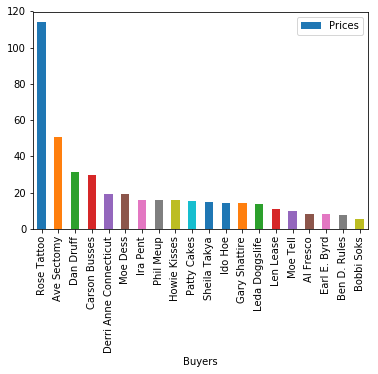

In [30]:
ax = df.plot.bar(x='Buyers', y='Prices')

## xpath Expressions Tutorial

xpath is used for querying and filtering documents written in an xml format. html can be thought of as a specific type of xml and therefore html documents can also be queried using xpath expressions.

Fundamentally, xml documents are a tree of nodes used to encapsulate data with a defined structure, see the example below. Once this structure is understood, xpath expression can be used to navigate the tree and filter out data.

In [18]:
from lxml import etree

# Parsing from a file
root = etree.parse("simple_xml.xml")
print("############# Example xml file ###############\n")
print(etree.tostring(root,pretty_print=True).decode('UTF-8'))

############# Example xml file ###############

<bookstore>

<book>
  <title lang="ge">
    Harry Potter
  </title>
  <price currency="pounds">29.99</price>
  <author lang="ge">
    <firstname>Joanne</firstname>
    <lastname> Rowling</lastname>
  </author>
</book>

<book>
  <title lang="en">Learning XML</title>
  <price currency="dollars">39.95</price>
  <author lang="en">
    <firstname>John</firstname>
    <lastname> Smith</lastname>
  </author>
  <author lang="en">
    <firstname>Fred</firstname>
    <lastname> Blogs</lastname>
  </author>
</book>

</bookstore>



The xml standard defines 7 types of node:
* element
* attribute
* text
* namespace
* processing-instruction
* comment
* document
For more information about xml see the [w3c xml essentials page](https://www.w3.org/standards/xml/core#specifications)

The terms: Parent, Child, Sibling, Ancestor, Descendent are used to define node relationships in the expected way. So, in the example above, title is a child of book; book is the parent of title; title and price are siblings; firstname is a descendent of book and book is an ancestor of title.

The following sections demonstrate a specific aspect of xpath expression using the example xml file above and are based on the [xpath tutorial at the w3 schools](https://www.w3schools.com/xml/xpath_intro.asp) 

#### node name, attribute name, absolute path and "//"

To extract all instances of a node with a particular name, the xpath expression can just be the node name or the node name preceded by "//". Similarly, to extract all instances of a particular attribute the attribute name is used preceded by "//@". See the code below.

In [19]:
print("######## node name ###########\n")
nodes = root.xpath('book')
print_nodes(nodes)

print("######## //node name ###########\n")
nodes = root.xpath('//book')
print_nodes(nodes)

print("######## //@attribute name ###########\n")
nodes = root.xpath('//@lang')
print_nodes(nodes)

######## node name ###########

########### Node start ###############
<book>
  <title lang="ge">
    Harry Potter
  </title>
  <price currency="pounds">29.99</price>
  <author lang="ge">
    <firstname>Joanne</firstname>
    <lastname> Rowling</lastname>
  </author>
</book>



########### Node end ###############
########### Node start ###############
<book>
  <title lang="en">Learning XML</title>
  <price currency="dollars">39.95</price>
  <author lang="en">
    <firstname>John</firstname>
    <lastname> Smith</lastname>
  </author>
  <author lang="en">
    <firstname>Fred</firstname>
    <lastname> Blogs</lastname>
  </author>
</book>



########### Node end ###############
######## //node name ###########

########### Node start ###############
<book>
  <title lang="ge">
    Harry Potter
  </title>
  <price currency="pounds">29.99</price>
  <author lang="ge">
    <firstname>Joanne</firstname>
    <lastname> Rowling</lastname>
  </author>
</book>



########### Node end ############

The "//" operator finds all of the descendents of the element node preceding the "//" with the node name following the "//". So, in the example below, all of the authors of the second book are found.

In [20]:
print("######## //second book authors ###########\n")
nodes = root.xpath('/bookstore/book[2]//author')
print_nodes(nodes)


######## //second book authors ###########

########### Node start ###############
<author lang="en">
    <firstname>John</firstname>
    <lastname> Smith</lastname>
  </author>
  

########### Node end ###############
########### Node start ###############
<author lang="en">
    <firstname>Fred</firstname>
    <lastname> Blogs</lastname>
  </author>


########### Node end ###############


#### Predicates

Predicates are used to find specific nodes, or a specific range of nodes. For the example xml document above we could use predicates to find the first book; the first 3 book or the book with a price greater than £35. Predicates are always specified as a condition within square brackets. So "//title[@lang='en']" will find all title nodes with attribute lang set to "en". 

In [11]:
print("######## first node ###########\n")
nodes = root.xpath('/bookstore/book[1]')
print_nodes(nodes)
print("length of node list: "+str(len(nodes))+"\n")

print("######## last node ###########\n")
nodes = root.xpath('/bookstore/book[last()]')
print_nodes(nodes)
print("length of node list: "+str(len(nodes))+"\n")

print("######## pos < 2 node ###########\n")
nodes = root.xpath('/bookstore/book[position()<2]')
print_nodes(nodes)
print("length of node list: "+str(len(nodes))+"\n")

print("######## price greater than 35 nodes ###########\n")
nodes = root.xpath('/bookstore/book[price>35.00]')
print_nodes(nodes)
print("length of node list: "+str(len(nodes))+"\n")

print("######## price greater than 35 title nodes ###########\n")
nodes = root.xpath('/bookstore/book[price>35.00]/title')
print_nodes(nodes)
print("length of node list: "+str(len(nodes))+"\n")

print("######## title nodes with attribute lang  ###########\n")
nodes = root.xpath('//title[@lang]')
print_nodes(nodes)
print("length of node list: "+str(len(nodes))+"\n")

print("######## title nodes with attribute lang='en' ###########\n")
nodes = root.xpath('//title[@lang="en"]')
print_nodes(nodes)
print("length of node list: "+str(len(nodes))+"\n")


######## first node ###########

########### Node start ###############
<book>
  <title lang="ge">
    Harry Potter
  </title>
  <price currency="pounds">29.99</price>
  <author lang="ge">
    <firstname>Joanne</firstname>
    <lastname> Rowling</lastname>
  </author>
</book>



########### Node end ###############
length of node list: 1

######## last node ###########

########### Node start ###############
<book>
  <title lang="en">Learning XML</title>
  <price currency="dollars">39.95</price>
  <author lang="en">
    <firstname>John</firstname>
    <lastname> Smith</lastname>
  </author>
  <author lang="en">
    <firstname>Fred</firstname>
    <lastname> Blogs</lastname>
  </author>
</book>



########### Node end ###############
length of node list: 1

######## pos < 2 node ###########

########### Node start ###############
<book>
  <title lang="ge">
    Harry Potter
  </title>
  <price currency="pounds">29.99</price>
  <author lang="ge">
    <firstname>Joanne</firstname>
    <las

#### Wildcards

The "\*" operator is used as a wild card. The syntax "//book[2]/\*" will select all of the element nodes in the second book; the syntax "//book[1]/@\*" will select all of the attribute nodes in the first book and the syntax "//book[1]/nodes()" will select all nodes of any kind within the first book (NEEDS MORE INVESTIGATION AS DOESN'T SEEM TO PICK UP ATTRIBUTES NODES). The code below demonstrates each of these selections.

In [12]:
print("######## element nodes in the second book ###########\n")
nodes = root.xpath('//book[2]/*')
print_nodes(nodes)
print("length of node list: "+str(len(nodes))+"\n")

print("######## attributes nodes in the first book  ###########\n")
nodes = root.xpath('//book[1]//@*')
print_nodes(nodes)
print("length of node list: "+str(len(nodes))+"\n")

print("######## all nodes in the first book ###########\n")
nodes = root.xpath('//book[1]//node()')
print_nodes(nodes)
print("length of node list: "+str(len(nodes))+"\n")

######## element nodes in the second book ###########

########### Node start ###############
<title lang="en">Learning XML</title>
  

########### Node end ###############
########### Node start ###############
<price currency="dollars">39.95</price>
  

########### Node end ###############
########### Node start ###############
<author lang="en">
    <firstname>John</firstname>
    <lastname> Smith</lastname>
  </author>
  

########### Node end ###############
########### Node start ###############
<author lang="en">
    <firstname>Fred</firstname>
    <lastname> Blogs</lastname>
  </author>


########### Node end ###############
length of node list: 4

######## attributes nodes in the first book  ###########

########### Node start ###############
node name = ge
node attribute = lang
node.is_attribute = True
node.is_text = False
node.is_tail = False
########### Node end ###############
########### Node start ###############
node name = pounds
node attribute = currency
node.is_attri

#### Axes

xpath "axes" expressions are used to select a node that is related to (parent, child etc) the node selected by the preceding part of the xpath syntax.  For example in the xpath syntax "//firstname/parent::\*", the axes parent selects the parents of the "firstname" nodes. The code below demonstrates using "axes" syntax.

In [21]:
print("######## parents of firstname nodes ###########\n")
nodes = root.xpath('//firstname/parent::*')
print_nodes(nodes)
print("length of node list: "+str(len(nodes))+"\n")

print("######## ancestors of firstname nodes ###########\n")
nodes = root.xpath('//firstname/ancestor::*')
print_nodes(nodes)
print("length of node list: "+str(len(nodes))+"\n")

print("######## attribute of firstname nodes ###########\n")
nodes = root.xpath('//author/attribute::*')
print_nodes(nodes)
print("length of node list: "+str(len(nodes))+"\n")

print("########  child of author nodes ###########\n")
nodes = root.xpath('//author/child::*')
print_nodes(nodes)
print("length of node list: "+str(len(nodes))+"\n")

print("########  following-sibling of price ###########\n")
nodes = root.xpath('//price/following-sibling::*')
print_nodes(nodes)
print("length of node list: "+str(len(nodes))+"\n")



######## parents of firstname nodes ###########

########### Node start ###############
<author lang="ge">
    <firstname>Joanne</firstname>
    <lastname> Rowling</lastname>
  </author>


########### Node end ###############
########### Node start ###############
<author lang="en">
    <firstname>John</firstname>
    <lastname> Smith</lastname>
  </author>
  

########### Node end ###############
########### Node start ###############
<author lang="en">
    <firstname>Fred</firstname>
    <lastname> Blogs</lastname>
  </author>


########### Node end ###############
length of node list: 3

######## ancestors of firstname nodes ###########

########### Node start ###############
<bookstore>

<book>
  <title lang="ge">
    Harry Potter
  </title>
  <price currency="pounds">29.99</price>
  <author lang="ge">
    <firstname>Joanne</firstname>
    <lastname> Rowling</lastname>
  </author>
</book>

<book>
  <title lang="en">Learning XML</title>
  <price currency="dollars">39.95</price>
  <a

#### Location Path Expression

General xpath syntax can be written as:

* absolute path /step/step/step
* relative path - step/step/step

each step has the syntax:

"axisname::nodetest[predicate]"

E.g. /bookstore/book[2]/author/child::firstname

Will select all firstname nodes that are children of author in the second book node

In [22]:
print("######## firstname children of author in book 2 ###########\n")
nodes = root.xpath('/bookstore/book[2]/author/child::firstname')
print_nodes(nodes)
print("length of node list: "+str(len(nodes))+"\n")

print("######## all children of book 2 ###########\n")
nodes = root.xpath('/bookstore/book[2]/child::*')
print_nodes(nodes)
print("length of node list: "+str(len(nodes))+"\n")

print("######## the second author of book 2 ###########\n")
nodes = root.xpath('/bookstore/book[2]/descendant::author[position()=2]')
print_nodes(nodes)
print("length of node list: "+str(len(nodes))+"\n")



######## firstname children of author in book 2 ###########

########### Node start ###############
<firstname>John</firstname>
    

########### Node end ###############
########### Node start ###############
<firstname>Fred</firstname>
    

########### Node end ###############
length of node list: 2

######## all children of book 2 ###########

########### Node start ###############
<title lang="en">Learning XML</title>
  

########### Node end ###############
########### Node start ###############
<price currency="dollars">39.95</price>
  

########### Node end ###############
########### Node start ###############
<author lang="en">
    <firstname>John</firstname>
    <lastname> Smith</lastname>
  </author>
  

########### Node end ###############
########### Node start ###############
<author lang="en">
    <firstname>Fred</firstname>
    <lastname> Blogs</lastname>
  </author>


########### Node end ###############
length of node list: 4

######## the second author of book 2 ###

#### Operators

The "|" symbol can be used to specify one xpath expression or the other. E.g. "//book/title | //book/author". The "and" and "or" operators can be used to specify more complex predicates. E.g. //book[price < 40 and price > 30] will select all book whose price is greater than 30 pounds and less than 40 pounds. Similarly, //book[2]/author[firstname="John" or firstname="Fred"] will select all authors in the second book whose firstname is John or Fred.

In [26]:
print("######## selecting title or author within the book node ###########\n")
nodes = root.xpath('//book/title | //book/author')
print_nodes(nodes)
print("length of node list: "+str(len(nodes))+"\n")

print("######## selecting books with price less than 40 or greater than 30 ###########\n")
nodes = root.xpath('//book[price < 40 and price > 30]')
print_nodes(nodes)
print("length of node list: "+str(len(nodes))+"\n")

print("######## selecting authors with firstname John or Fred in the second book ###########\n")
nodes = root.xpath('//book[2]/author[firstname="John" or firstname="Fred"]')
print_nodes(nodes)
print("length of node list: "+str(len(nodes))+"\n")

######## selecting title or author within the book node ###########

########### Node start ###############
<title lang="ge">
    Harry Potter
  </title>
  

########### Node end ###############
########### Node start ###############
<author lang="ge">
    <firstname>Joanne</firstname>
    <lastname> Rowling</lastname>
  </author>


########### Node end ###############
########### Node start ###############
<title lang="en">Learning XML</title>
  

########### Node end ###############
########### Node start ###############
<author lang="en">
    <firstname>John</firstname>
    <lastname> Smith</lastname>
  </author>
  

########### Node end ###############
########### Node start ###############
<author lang="en">
    <firstname>Fred</firstname>
    <lastname> Blogs</lastname>
  </author>


########### Node end ###############
length of node list: 5

######## selecting books with price less than 40 or greater than 30 ###########

########### Node start ###############
<book>
  <title la

## Appendix

The functions below are used throughout this notebook, they are not central to the content presented and have been included once in the appendix to avoid repetition.

In [2]:
# function used to print nodes

def print_nodes(nodes):
    for node in nodes:
        if type(node).__name__=="_Element":
            print("########### Node start ###############")
            print(etree.tostring(node,pretty_print=True).decode('UTF-8'))
            print("########### Node end ###############")
        elif type(node).__name__=="_ElementUnicodeResult":
            print("########### Node start ###############")
            print("node name = " + node)
            print("node attribute = " + str(node.attrname))
            print("node.is_attribute = " + str(node.is_attribute))
            print("node.is_text = " + str(node.is_text))
            print("node.is_tail = " + str(node.is_tail))
            print("########### Node end ###############")